In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"B:\Bank Project\bankruptcy-prevention (1) (1).xlsx")
df

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


##  Extrecting Raw Data

In [3]:
# splitting columns
columns=[]
for col in df.columns:   
    columns.append(col.split(';'))

# splitting values 
values=[]
for col in df.values:
    values.append(col[0].split(';'))

# removing extra spaces from column names
columns1=[]
for col in columns[0]:
    columns1.append(col.strip())


In [4]:
# creating new dataframe
new_df=pd.DataFrame(values,columns=columns1)
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


## Saving Data Set 

In [5]:
new_df.to_excel("bankruptcy.xlsx")

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [7]:
# changing dtypes to float
for col in new_df.columns.drop('class'):
    new_df[col]=new_df[col].astype(float)

In [8]:
# changing values
new_df=new_df.replace({'bankruptcy':0,'non-bankruptcy':1})
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [9]:
new_df["class"].unique()

array([0, 1])

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


## Visualization

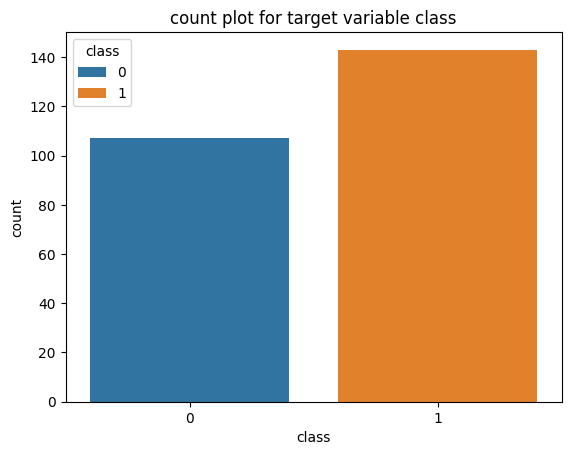

In [30]:
#count plot to know the how many variables in our target column
sns.countplot(x='class',hue='class',data=new_df)
plt.title("count plot for target variable class")
plt.show()

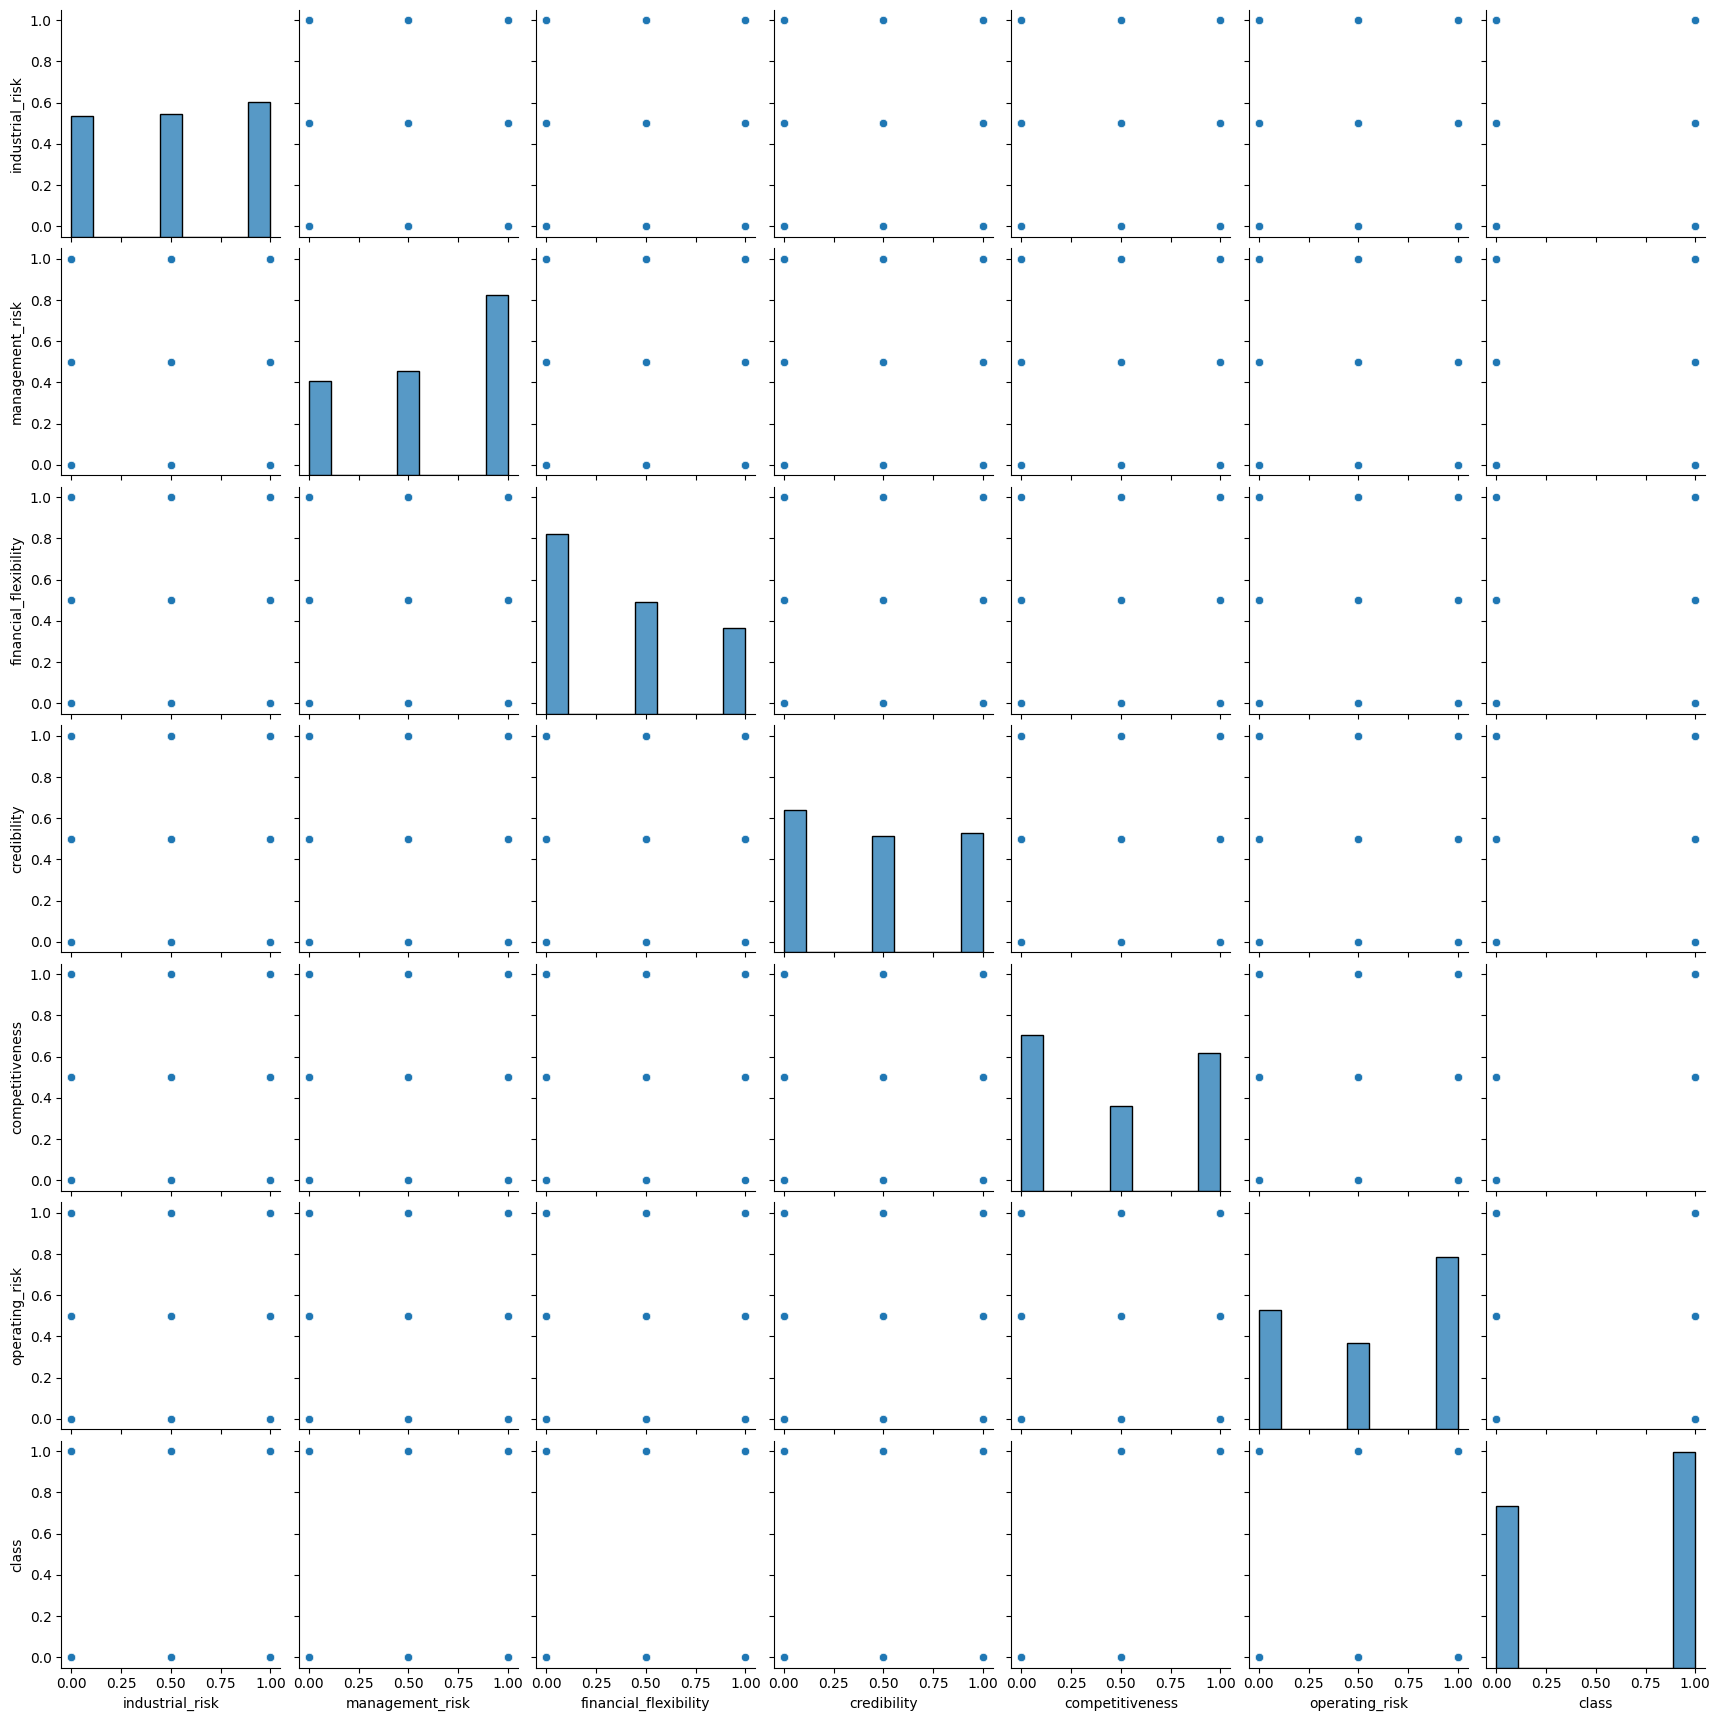

In [12]:
#Pairplot for to knowing the relaction between each column
sns.pairplot(data=new_df)

## Box plot grouped by traget column and scatter plot relation b/w traget column

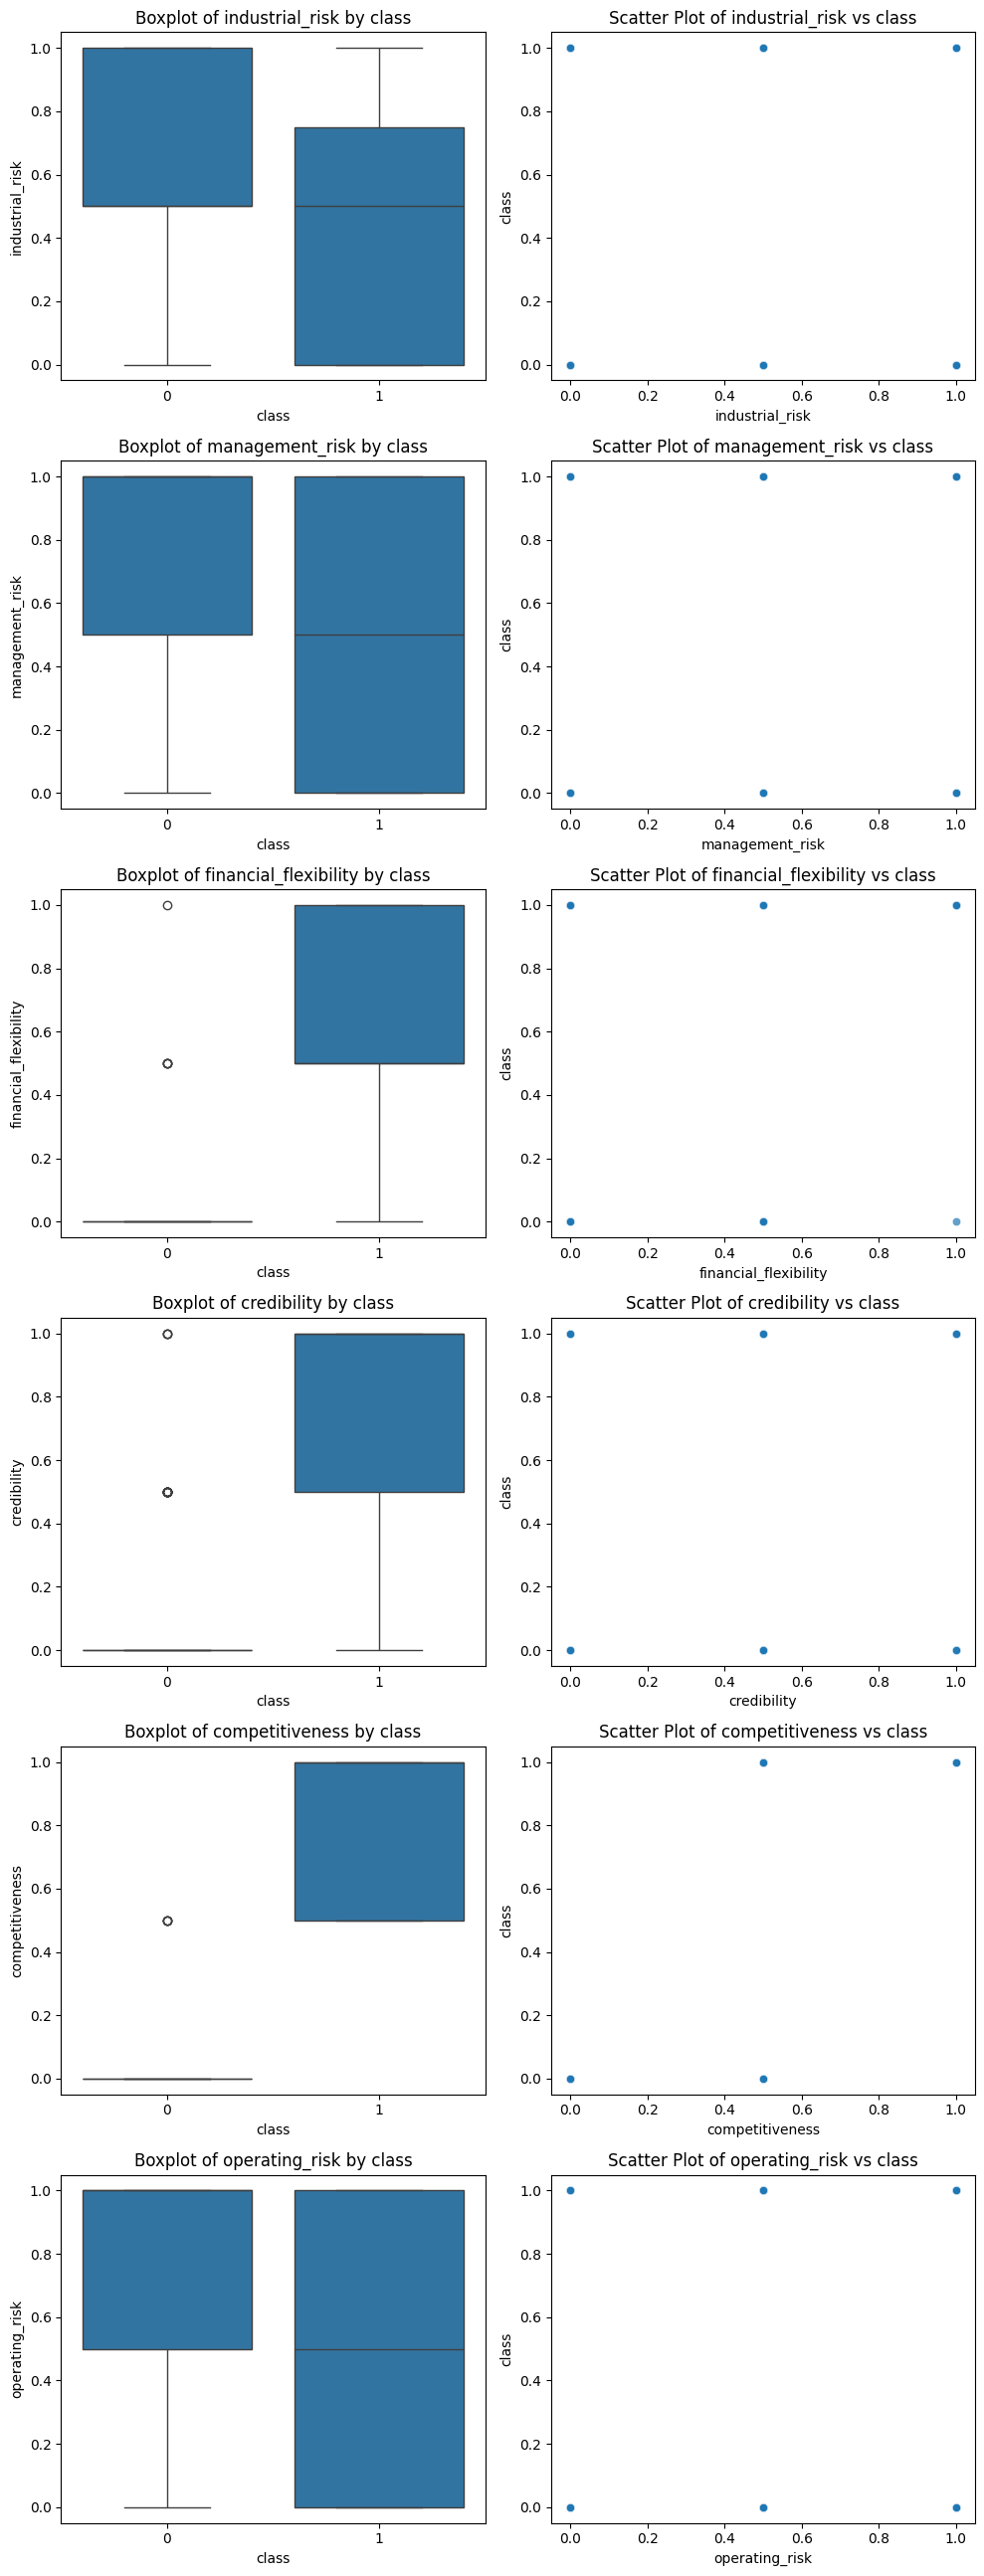

In [13]:
features=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
target='class'

#Plotting boxplots and scatter plots using a for loop
plt.figure(figsize=(10, 26))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2 * i - 1)
    sns.boxplot(x=target, y=feature, data=new_df)
    plt.title(f"Boxplot of {feature} by {target}") # grouped by regions
    
    plt.subplot(len(features), 2, 2 * i ) 
    sns.scatterplot(x=feature, y=target, data=new_df, alpha=0.7)
    plt.title(f"Scatter Plot of {feature} vs {target}")  #relationship b/w two columns

plt.tight_layout()
plt.show()

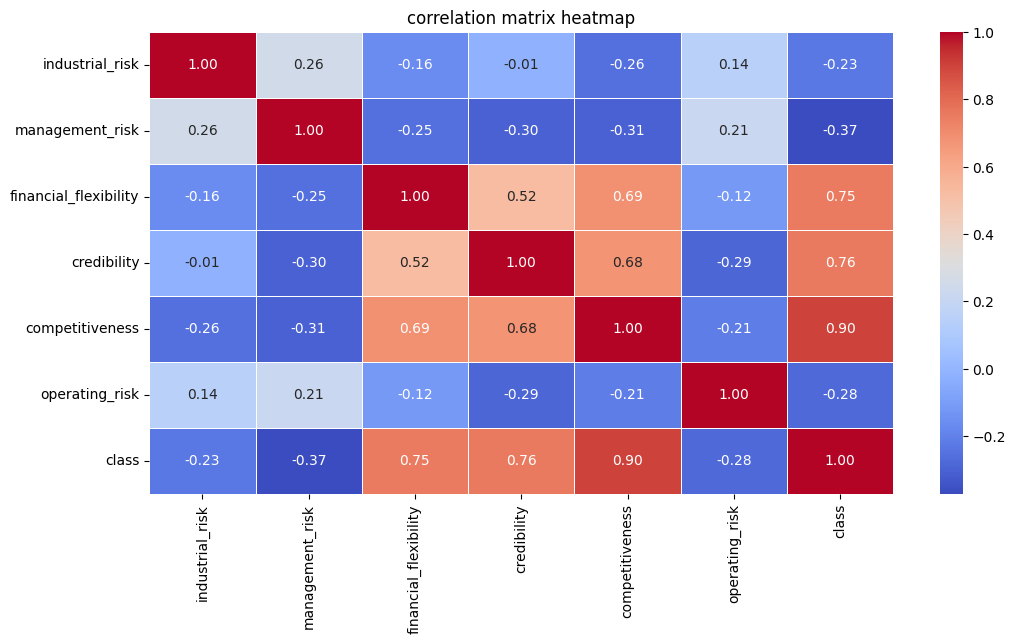

In [31]:
#correlation matrix for all columns
plt.figure(figsize=(12,6))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("correlation matrix heatmap")
plt.show()


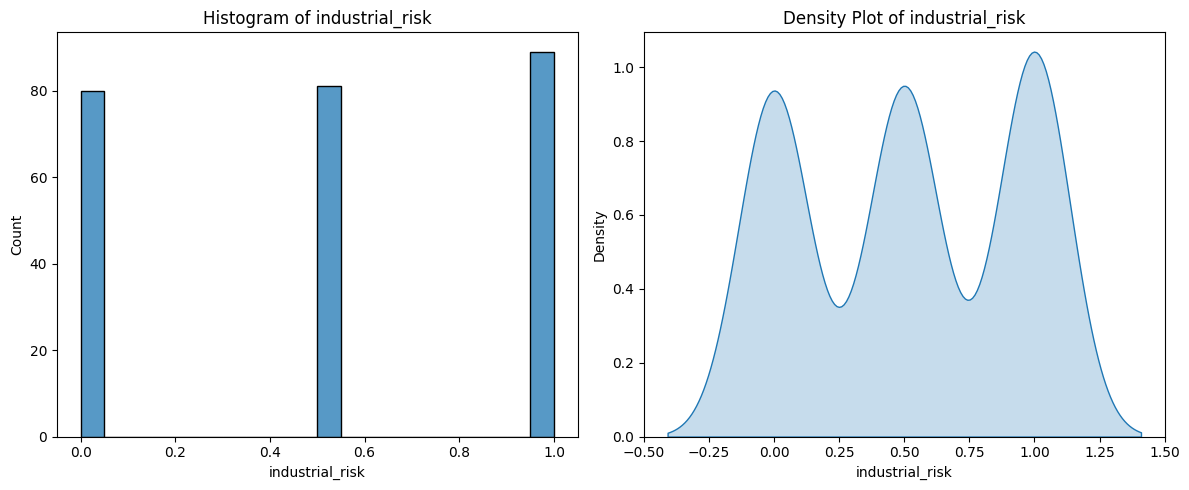

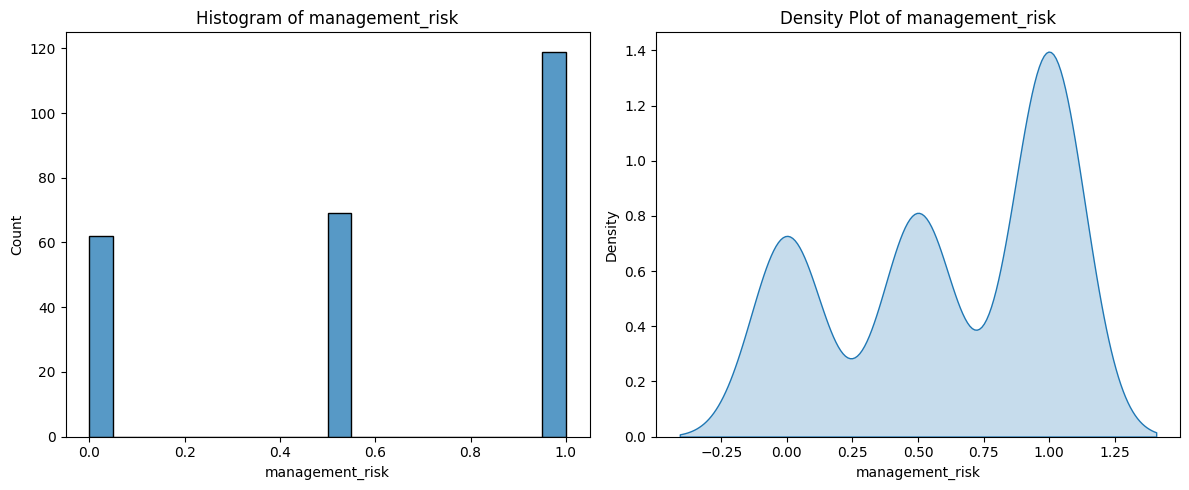

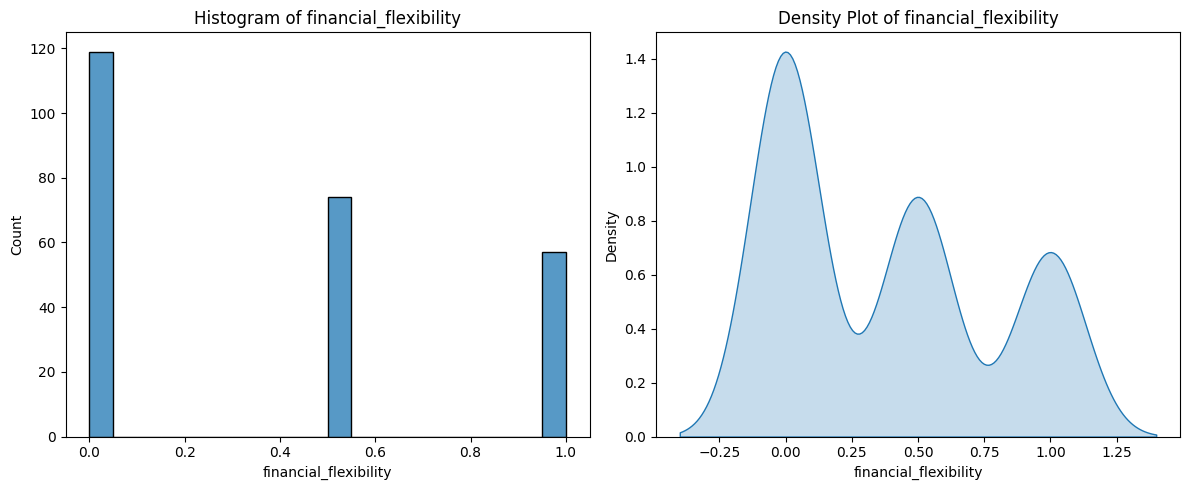

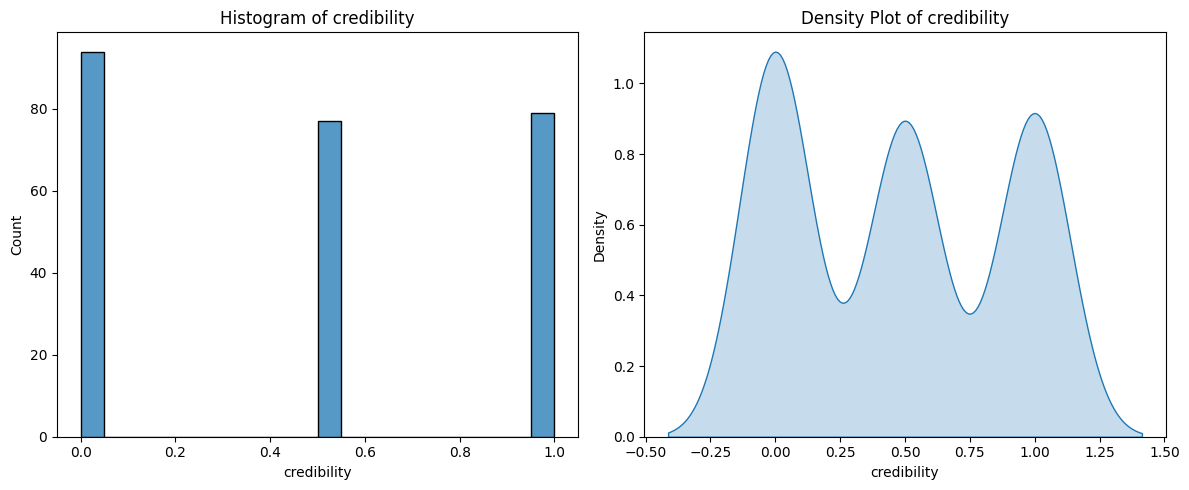

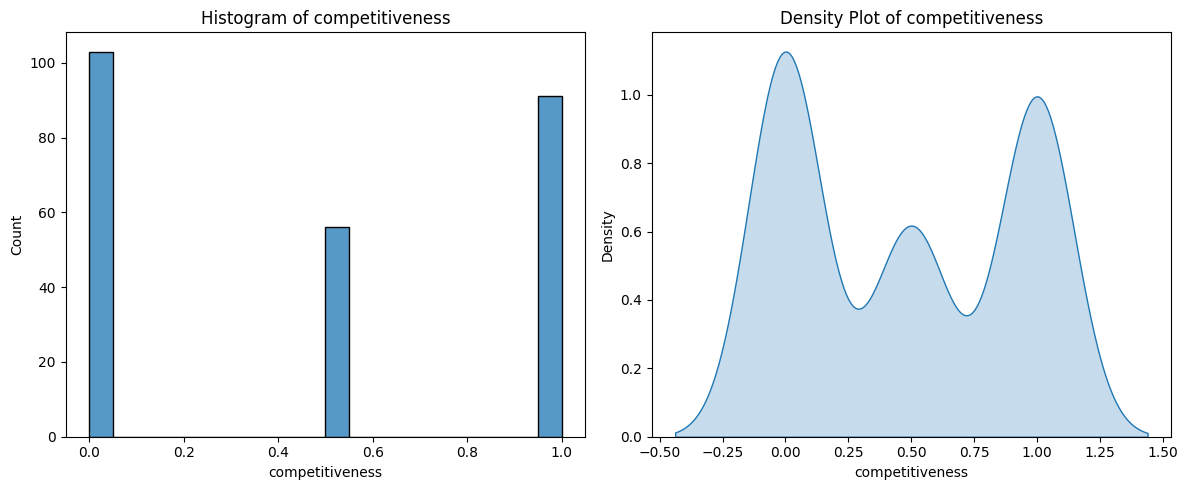

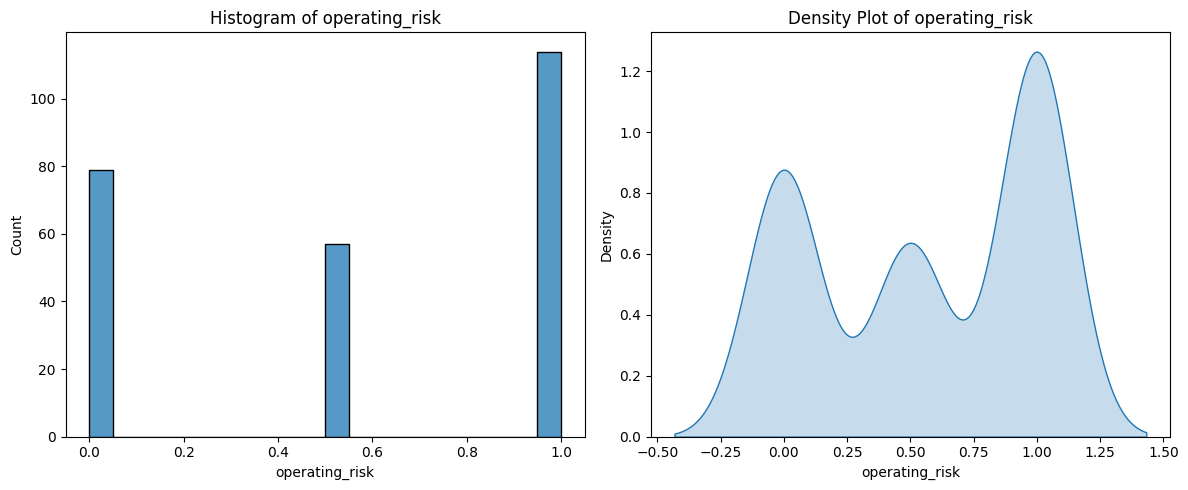

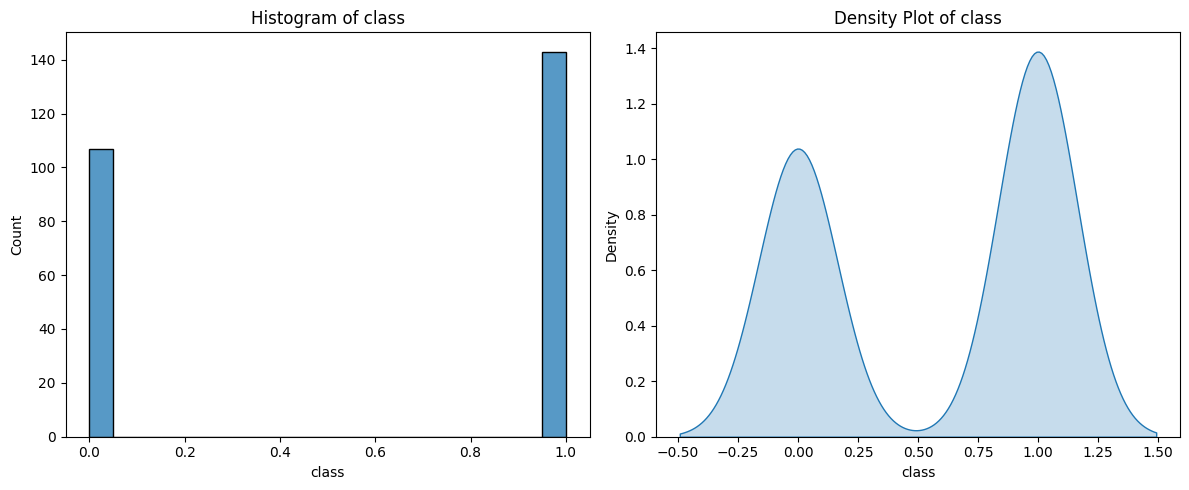

In [15]:
#Select numerical columns
num_columns = new_df.select_dtypes(include=['float', 'int']).columns

# Create subplots for each column
for col in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    
    # Histogram
    sns.histplot(new_df[col], bins=20, kde=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    
    # Density Plot
    sns.kdeplot(new_df[col], shade=True, ax=axes[1])
    axes[1].set_title(f'Density Plot of {col}')
    
    plt.tight_layout()
    plt.show()


## Spliting data into train and test sets

In [16]:
from sklearn.model_selection import train_test_split

x = new_df.drop(columns=['class'])
y = new_df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((200, 6), (50, 6), (200,), (50,))

## Bluding model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree , export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score

model_performance = {}

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
model_performance['Logistic Regression'] = {
    'MAE':mean_absolute_error(y_test,y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 score': r2_score(y_test, y_pred_lr)
     
}

# Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train) 
y_pred_dt = dt_model.predict(x_test)
model_performance['Decision Tree'] = {
    'MAE':mean_absolute_error(y_test,y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 score': r2_score(y_test, y_pred_dt)


}

# Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100,max_depth=10)
rf_model.fit(x_train, y_train) 
y_pred_rf = rf_model.predict(x_test)
model_performance['Random Forest'] = {
    'MAE':mean_absolute_error(y_test,y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 score': r2_score(y_test, y_pred_rf)

}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)
model_performance['Support Vector Regressor'] = {
    'MAE':mean_absolute_error(y_test,y_pred_svr),
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 score': r2_score(y_test, y_pred_svr)
        

 }

# XG boost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(x_train, y_train)
y_pred_xg=xgb_model.predict(x_test)
model_performance['XG Boost'] = {
    'MAE':mean_absolute_error(y_test,y_pred_xg),
    'MSE': mean_squared_error(y_test, y_pred_xg),
    'R2 score': r2_score(y_test, y_pred_xg)

}

#KNN
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)
y_pred_knn=knn_model.predict(x_test)
model_performance['KNN'] = {
    'MAE':mean_absolute_error(y_test,y_pred_knn),
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 score': r2_score(y_test, y_pred_knn)

}

In [18]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(x_train, y_train)
importances = xgb_model.feature_importances_
feature_names=new_df.columns
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.2f}")

industrial_risk: 0.00
management_risk: 0.00
financial_flexibility: 0.00
credibility: 0.07
competitiveness: 0.93
operating_risk: 0.00


In [19]:
results=pd.DataFrame(model_performance)
#results.to_excel("metrics.xlsx")
results

,Logistic Regression,Decision Tree,Random Forest,Support Vector Regressor,XG Boost,KNN
MAE,0.0,0.020000,0.0,0.077421,0.020068,0.020000
MSE,0.0,0.020000,0.0,0.010282,0.019900,0.020000
R2 score,1.0,0.917898,1.0,0.957791,0.918309,0.917898


In [27]:
dt_model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

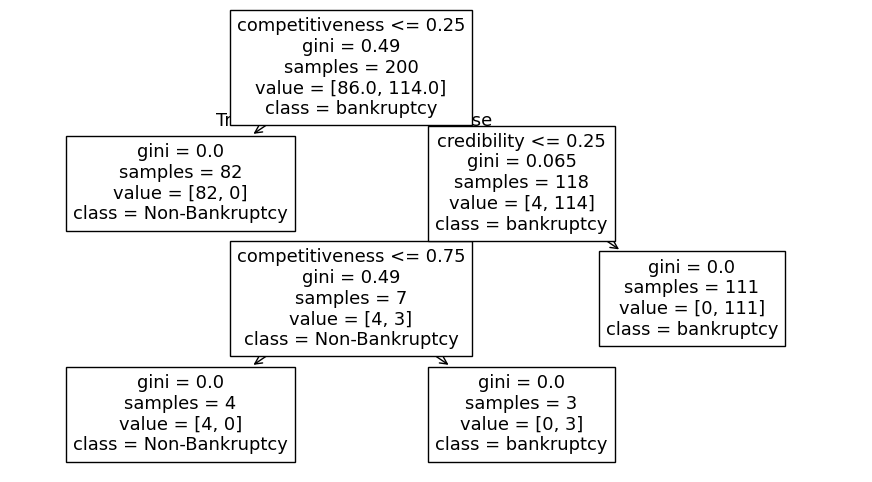

In [21]:
plt.figure(figsize=(11,6))
plot_tree(dt_model,feature_names=x.columns, class_names=["Non-Bankruptcy","bankruptcy"])
plt.show()

In [22]:
tree_rules= export_text(dt_model, feature_names=list(x.columns))
print("Decision Tree Rules", tree_rules)

Decision Tree Rules |--- competitiveness <= 0.25
|   |--- class: 0
|--- competitiveness >  0.25
|   |--- credibility <= 0.25
|   |   |--- competitiveness <= 0.75
|   |   |   |--- class: 0
|   |   |--- competitiveness >  0.75
|   |   |   |--- class: 1
|   |--- credibility >  0.25
|   |   |--- class: 1



We taken Desion Tree model for diployment

In [28]:
import pickle

# Saving Random Forest model 
model_file_name = "ruptcy_model.pkl"

try:
    with open(model_file_name, 'wb') as file:
        pickle.dump(dt_model, file)
    print(f"Model saved successfully to {model_file_name}")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully to ruptcy_model.pkl
